## 1. Predicting `CIFAR10` dataset with `Machine Learning tools`

### 1.1. Using `PCA & SVM`

**Loading dataset**

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


**Viewing shape for each set**

In [2]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


**Number of classes**

In [3]:
import numpy as np

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


**create label_dict by combining classes_number corresponding to its name**

In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
label_dict = {id : classes[id] for id in range(len(classes))}
print(label_dict)

{0: 'plane', 1: 'car', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


**Viewin some image**

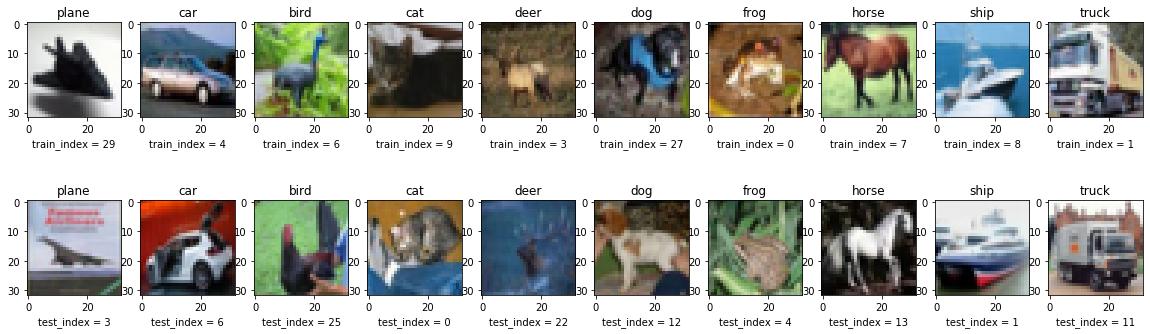

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=[20, 6])

# Display the 10 first images for each class in training & testing dataset
for k in range(10):
    id_train = y_train.reshape(-1).tolist().index(k)
    plt.subplot(2, 10, k+1)
    plt.imshow(x_train[id_train], cmap = 'gray')
    plt.title(str(label_dict[y_train.reshape(-1)[id_train]]))
    plt.xlabel("train_index = " + str(id_train))
    
    
    plt.subplot(2, 10, k + 11)
    id_test = y_test.reshape(-1).tolist().index(k)
    plt.imshow(x_test[id_test], cmap = 'gray')
    plt.title(str(label_dict[y_test.reshape(-1)[id_test]]))
    plt.xlabel("test_index = " + str(id_test))

**Explore the values_range of x_train**; the pixels values is in [0, 255]

In [6]:
print('x_train_min = ', np.min(x_train), 
      '\nx_train_mean = ', np.mean(x_train), 
      '\nx_train_max = ', np.max(x_train))

x_train_scale = x_train / 255

x_train_min =  0 
x_train_mean =  120.70756512369792 
x_train_max =  255


Since the 1st `approach` is using `PCA`; so we must reshape the dataset in x_train to get a matrix (row = number of observations) then create a dataframe

In [8]:
import pandas as pd
x_train_flat = x_train_scale.reshape(x_train.shape[0], -1)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


**Initialize `PCA` model**

In [9]:
from time import time
from sklearn.decomposition import PCA

t0 = time()

x_test_scale = x_test / 255
x_test_scale = x_test_scale.reshape(x_test.shape[0], -1)

pca = PCA(0.95)
pca.fit(df_cifar.iloc[:, :-1])
x_train_pca = pca.transform(df_cifar.iloc[:, :-1])
x_test_pca = pca.transform(x_test_scale)

print("To get 95% explained_variances; n_components = ", pca.n_components_, "(done in %0.3fs" % (time() - t0), ").")

To get 95% explained_variances; n_components =  217 (done in 83.256s ).


**Fit `SVM` model**

In [11]:
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(x_train_pca, y_train.ravel())
print("SVM fitted model & done in %0.3fs" % (time() - t0))

SVM fitted model & done in 821.363s


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_train = clf.predict(x_train_pca)
y_pred = clf.predict(x_test_pca)
print("SVM's predicting done in %0.3fs" % (time() - t0)) 

SVM's predicting done in 1508.359s


In [13]:
print(classification_report(y_test.ravel(), y_pred, target_names = classes))
print(confusion_matrix(y_test.ravel(), y_pred))
print('Train_acc: \t', accuracy_score(y_train.ravel(), y_pred_train))
print('Test_acc: \t', accuracy_score(y_test.ravel(), y_pred))
print("SVM's evaluating done in %0.3fs" % (time() - t0))

              precision    recall  f1-score   support

       plane       0.61      0.62      0.62      1000
         car       0.65      0.65      0.65      1000
        bird       0.43      0.41      0.42      1000
         cat       0.38      0.38      0.38      1000
        deer       0.46      0.43      0.45      1000
         dog       0.50      0.44      0.47      1000
        frog       0.53      0.65      0.58      1000
       horse       0.64      0.57      0.60      1000
        ship       0.65      0.69      0.67      1000
       truck       0.59      0.62      0.61      1000

    accuracy                           0.55     10000
   macro avg       0.54      0.55      0.54     10000
weighted avg       0.54      0.55      0.54     10000

[[624  26  56  18  22  17  21  25 139  52]
 [ 35 645  24  39   7  16  16  19  49 150]
 [ 85  23 405  92 139  55 114  48  24  15]
 [ 35  30  90 383  60 164 120  41  26  51]
 [ 53  14 153  64 435  39 137  71  19  15]
 [ 17  12  83 194  72 440 

### 1.2. Using `PCA & KNN`

In [21]:
from sklearn.neighbors import KNeighborsClassifier
t0 = time()
knn = KNeighborsClassifier(10)
knn.fit(x_train_pca, y_train.ravel())
print("KNN fitted model & done in %0.3fs" % (time() - t0))

KNN fitted model & done in 3.215s


In [22]:
t0 = time()
y_pred_train = knn.predict(x_train_pca)
y_pred = knn.predict(x_test_pca)
print("KNN's predicting done in %0.3fs" % (time() - t0)) 

t0 = time()
print(classification_report(y_test.ravel(), y_pred, target_names = classes))
print(confusion_matrix(y_test.ravel(), y_pred))
print('Train_acc: \t', accuracy_score(y_train.ravel(), y_pred_train))
print('Test_acc: \t', accuracy_score(y_test.ravel(), y_pred))
print("KNN's evaluating done in %0.3fs" % (time() - t0))

KNN's predicting done in 722.907s
              precision    recall  f1-score   support

       plane       0.43      0.55      0.48      1000
         car       0.71      0.23      0.34      1000
        bird       0.23      0.44      0.30      1000
         cat       0.32      0.18      0.23      1000
        deer       0.25      0.53      0.34      1000
         dog       0.47      0.22      0.30      1000
        frog       0.34      0.37      0.35      1000
       horse       0.68      0.23      0.35      1000
        ship       0.41      0.69      0.52      1000
       truck       0.76      0.19      0.31      1000

    accuracy                           0.36     10000
   macro avg       0.46      0.36      0.35     10000
weighted avg       0.46      0.36      0.35     10000

[[547   5 111  14  50   3  34   9 227   0]
 [112 225 114  38 149  17  92  11 218  24]
 [105   2 438  38 258  28  71  10  47   3]
 [ 54   7 211 182 219  87 173  16  44   7]
 [ 59   1 253  23 532  10  64  17  

### 1.3. Using `TPOTClassifier` to find a best model

In [10]:
from tpot import TPOTClassifier

In [11]:
t0 = time()
tpot_clf = TPOTClassifier(generations = 8, population_size=10, offspring_size=5 , cv=5,
                          verbosity = 2, random_state=42)


# Fit the classifier to the training data
tpot_clf.fit(x_train_pca, y_train.ravel())

9# Score on the test set
print(tpot_clf.score(x_test_pca, y_test.ravel()))
print ('Fit&trainning time : ', (time() - t0))

Generation 1 - Current best internal CV score: 0.39978
Generation 2 - Current best internal CV score: 0.39978
Generation 3 - Current best internal CV score: 0.39978
Generation 4 - Current best internal CV score: 0.39978
Generation 5 - Current best internal CV score: 0.42612000000000005
Generation 6 - Current best internal CV score: 0.42612000000000005
Generation 7 - Current best internal CV score: 0.42612000000000005
Generation 8 - Current best internal CV score: 0.42612000000000005

Best pipeline: LogisticRegression(PCA(GaussianNB(input_matrix), iterated_power=3, svd_solver=randomized), C=0.001, dual=False, penalty=l2)
0.4263
Fit&trainning time :  4723.037305831909


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

tpot_clf.export('tpot_exported_pipeline.py')

In [20]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

t0 = time()

exported_pipeline = make_pipeline(
    StackingEstimator(estimator = GaussianNB()),
    PCA(iterated_power = 3, svd_solver = "randomized"),
    LogisticRegression(C = 0.001, dual = False, penalty = "l2")
)

set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(x_train_pca, y_train.ravel())

print ('Fit&trainning time : ', (time() - t0))

Fit&trainning time :  17.70314311981201


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
t0 = time()
y_pred_train = exported_pipeline.predict(x_train_pca)
y_pred = exported_pipeline.predict(x_test_pca)
print("Logistic_regression's predicting done in %0.3fs" % (time() - t0)) 

t0 = time()
print(classification_report(y_test.ravel(), y_pred, target_names = classes))
print(confusion_matrix(y_test.ravel(), y_pred))
print('Train_acc: \t', accuracy_score(y_train.ravel(), y_pred_train))
print('Test_acc: \t', accuracy_score(y_test.ravel(), y_pred))
print("Logistic_regression's evaluating done in %0.3fs" % (time() - t0))

Logistic_regression's predicting done in 7.657s
              precision    recall  f1-score   support

       plane       0.45      0.48      0.46      1000
         car       0.49      0.50      0.49      1000
        bird       0.32      0.28      0.30      1000
         cat       0.32      0.27      0.29      1000
        deer       0.41      0.38      0.39      1000
         dog       0.36      0.33      0.34      1000
        frog       0.43      0.53      0.48      1000
       horse       0.47      0.44      0.46      1000
        ship       0.48      0.54      0.51      1000
       truck       0.46      0.52      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.42      0.43      0.42     10000
weighted avg       0.42      0.43      0.42     10000

[[480  50  53  27  26  19  20  42 203  80]
 [ 48 499  23  42  14  31  47  43  75 178]
 [107  43 276  71 152  72 154  55  46  24]
 [ 42  48  99 268  61 179 118  75  39  71]
 [ 62  17 135  53 377

Since we only use `generations = 8`; it is not enough to find the best model among these `Machine Learning`'s methods. To get the better score, I

Beside that, the `Warning: xgboost.XGBClassifier is not available and will not be used by TPOT` will make the `Pipeline` is not `really efficient`

Below is the `Summarized Table`

|           |  SVM   |   KNN    |  Log_reg  |
|-----------|--------|----------|-----------|
| Train_acc |  0.681 | 0.45722  |  0.5289   |
| Test_acc  | 0.5458 |  0.3618  |  0.4324   |

## 2. Predicting with `Deep Learning neural networks`

### 2.1. Without `LSTM` and `RNN`; using `Keras`

In [37]:
from keras.models import Sequential
from  keras.layers  import Dense

model = Sequential()
model.add(Dense(units = 128, activation = 'relu', input_dim = pca.n_components_))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 10, activation = 'sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               27904     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 38,570
Trainable params: 38,570
Non-trainable params: 0
_________________________________________________________________


In [38]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

y_train_encoded = enc.fit_transform(y_train)
y_test_encoded = enc.transform(y_test)

In [39]:
history = model.fit(x_train_pca, y_train_encoded, epochs = 40, batch_size = 64,
                    verbose = 1, validation_data = [x_test_pca, y_test_encoded])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 4s 74us/step - loss: 0.2718 - accuracy: 0.9035 - val_loss: 0.2374 - val_accuracy: 0.9119
Epoch 2/40
50000/50000 [==============================] - 3s 60us/step - loss: 0.2265 - accuracy: 0.9147 - val_loss: 0.2251 - val_accuracy: 0.9145
Epoch 3/40
50000/50000 [==============================] - 3s 59us/step - loss: 0.2103 - accuracy: 0.9196 - val_loss: 0.2176 - val_accuracy: 0.9164
Epoch 4/40
50000/50000 [==============================] - 6s 114us/step - loss: 0.1986 - accuracy: 0.9234 - val_loss: 0.2135 - val_accuracy: 0.9182
Epoch 5/40
50000/50000 [==============================] - 3s 61us/step - loss: 0.1892 - accuracy: 0.9265 - val_loss: 0.2125 - val_accuracy: 0.9185
Epoch 6/40
50000/50000 [==============================] - 3s 65us/step - loss: 0.1815 - accuracy: 0.9294 - val_loss: 0.2112 - val_accuracy: 0.9185
Epoch 7/40
50000/50000 [==============================] - 3s 60us/s

In [40]:
train_pred = model.predict(x_train_pca)
test_pred = model.predict(x_test_pca)
test_pred

array([[6.6793345e-02, 3.1744735e-04, 1.4784032e-02, ..., 4.0796837e-03,
        2.5375161e-02, 8.1581908e-04],
       [1.7337280e-07, 2.0447524e-05, 1.4815339e-07, ..., 1.1273529e-09,
        9.9999869e-01, 3.3193745e-04],
       [7.6074231e-01, 2.7035156e-01, 2.4056137e-06, ..., 7.4589392e-04,
        2.7643734e-01, 1.0639077e-02],
       ...,
       [3.6873184e-03, 3.6516754e-05, 4.3507788e-01, ..., 1.2211630e-01,
        4.3399332e-04, 1.3208341e-04],
       [8.5516775e-04, 4.5069311e-02, 1.3611773e-02, ..., 4.1586258e-02,
        3.6176257e-02, 7.2666861e-02],
       [1.4546750e-01, 2.6806867e-02, 2.6925309e-02, ..., 1.5291112e-02,
        3.0676858e-02, 1.9961141e-02]], dtype=float32)

In [41]:
y_pred_train_decoded = []
y_pred_test_decoded = []

for x in train_pred:
    for i in range(x.shape[0]):
        if x[i] == max(x):
            y_pred_train_decoded.append(i)
            break
            
for x in test_pred:
    for i in range(x.shape[0]):
        if x[i] == max(x):
            y_pred_test_decoded.append(i)
            break
            
y_pred_train_decoded[:20]

[6, 9, 9, 4, 1, 1, 2, 7, 8, 2, 4, 7, 7, 2, 9, 9, 9, 5, 3, 6]

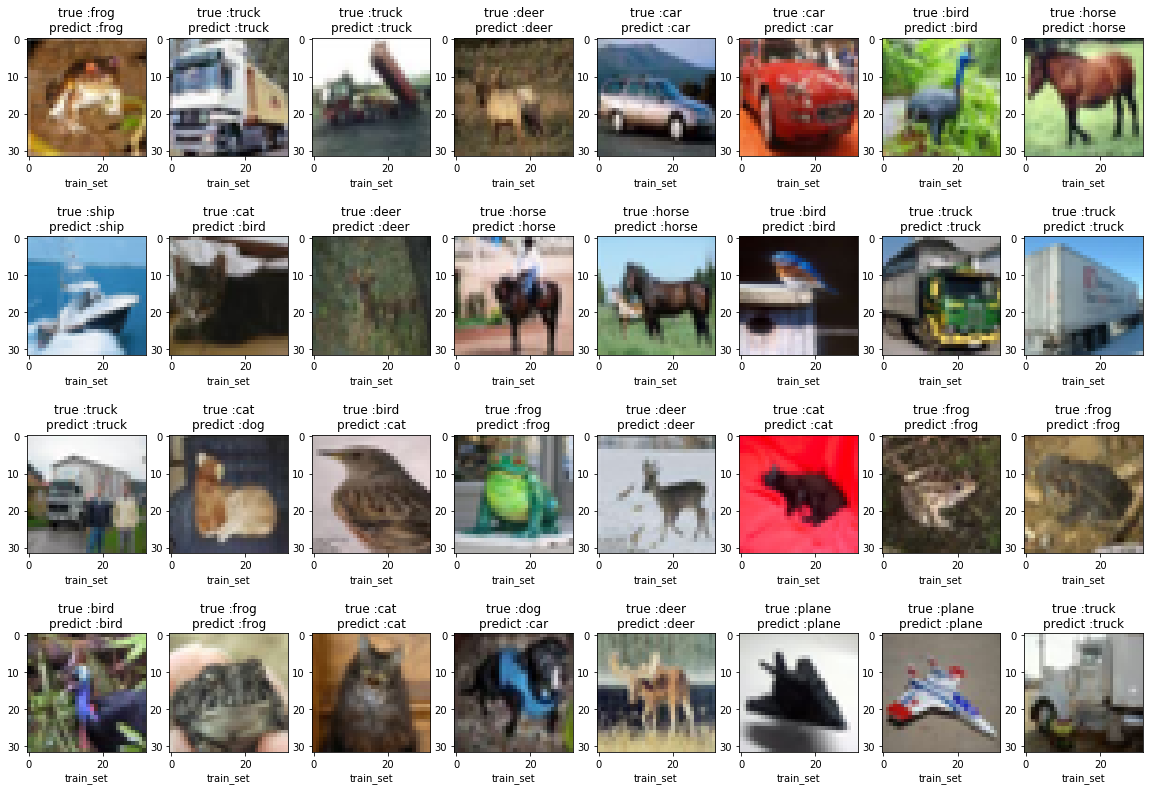

In [57]:
plt.figure(figsize=[20, 14])

# Display the 10 first images for each class in training & testing dataset
for k in range(32):
    plt.subplot(4, 8, k+1)
    plt.imshow(x_train[k], cmap = 'gray')
    plt.title('true :' + str(label_dict[y_train.ravel()[k]]) +
              '\npredict :' + str(label_dict[y_pred_train_decoded[k]]))
    plt.xlabel('train_set')

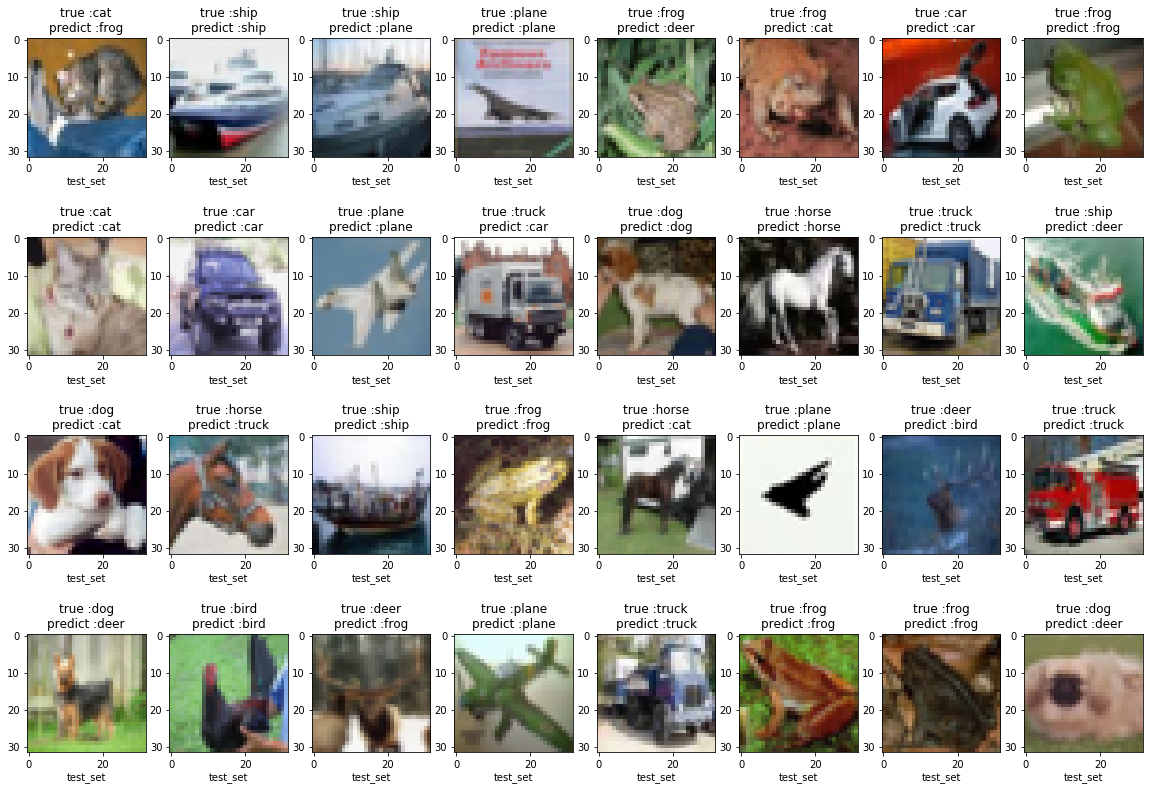

In [59]:
plt.figure(figsize=[20, 14])

# Display the 10 first images for each class in training & testing dataset
for k in range(32):
    plt.subplot(4, 8, k+1)
    plt.imshow(x_test[k], cmap = 'gray')
    plt.title('true :' + str(label_dict[y_test.ravel()[k]]) + 
              '\npredict :' + str(label_dict[y_pred_test_decoded[k]]))
    plt.xlabel('test_set')

In [51]:
print('-------------- classification_report & confusion_matrix for training set --------------')
print(classification_report(y_train.ravel(), y_pred_train_decoded, target_names = classes))
print(confusion_matrix(y_train.ravel(), y_pred_train_decoded))
print('-------------- classification_report & confusion_matrix for testing set --------------')
print(classification_report(y_test.ravel(), y_pred_test_decoded, target_names = classes))
print(confusion_matrix(y_test.ravel(), y_pred_test_decoded))
print('-------------- accuracy_scores in each set --------------')
print('Train_acc: \t', accuracy_score(y_train.ravel(), y_pred_train_decoded))
print('Test_acc: \t', accuracy_score(y_test.ravel(), y_pred_test_decoded))

-------------- classification_report & confusion_matrix for training set --------------
              precision    recall  f1-score   support

       plane       0.84      0.89      0.87      5000
         car       0.95      0.94      0.94      5000
        bird       0.71      0.73      0.72      5000
         cat       0.65      0.78      0.71      5000
        deer       0.81      0.74      0.77      5000
         dog       0.77      0.74      0.75      5000
        frog       0.89      0.84      0.86      5000
       horse       0.93      0.87      0.90      5000
        ship       0.91      0.93      0.92      5000
       truck       0.94      0.91      0.92      5000

    accuracy                           0.83     50000
   macro avg       0.84      0.83      0.84     50000
weighted avg       0.84      0.83      0.84     50000

[[4444   38  132   85   64   25   27   18  100   67]
 [  91 4684   15   37   10    8   15    5   67   68]
 [ 190   23 3630  393  287  213  126   56   49 

The `accuracy_scores` at the `train_set` is larger than in `SVM` while `test_set` is about `0.5` which is lower than; this leads to the **`overfiting problem`**.

To solve this, we will try to use `LSTM` or `RNN`; this will be discuss in the next section!

### 2.2. Using `LSTM`

In [17]:
from time import time
from sklearn.decomposition import PCA

t0 = time()
pca = PCA(0.99)
x_test_scale = x_test / 255
x_test_scale = x_test_scale.reshape(x_test.shape[0], -1)
pca.fit(x_train_scale.reshape(50000, -1))
x_train_pca = pca.transform(x_train_scale.reshape(50000, -1))
x_test_pca = pca.transform(x_test_scale.reshape(10000, -1))
print("To get 99% explained_variances; n_components = ", pca.n_components_, "(done in %0.3fs" % (time() - t0), ").")

To get 99% explained_variances; n_components =  658 (done in 46.507s ).


In [18]:
import numpy as np
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from  keras.layers  import Dense

model2 = Sequential()
model2.add(LSTM(256, activation='relu', return_sequences=True, 
                input_shape=(None, pca.n_components_),
                recurrent_dropout = 0.25))
model2.add(Dropout(0.15))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(LSTM(64, activation='relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(10, activation = 'sigmoid'))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 256)         936960    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
dense_5 (Dense)              (None, None, 128)         32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

In [19]:
history2 = model2.fit(x_train_pca.reshape(50000, 1, 658), y_train_encoded, epochs = 20, batch_size = 128,
                    verbose = 1, validation_data = [x_test_pca.reshape(10000, 1, 658), y_test_encoded])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 75us/step - loss: 0.0934 - val_loss: 0.0721
Epoch 2/20
50000/50000 [==============================] - 3s 59us/step - loss: 0.0679 - val_loss: 0.0640
Epoch 3/20
50000/50000 [==============================] - 3s 61us/step - loss: 0.0598 - val_loss: 0.0621
Epoch 4/20
50000/50000 [==============================] - 3s 59us/step - loss: 0.0541 - val_loss: 0.0612
Epoch 5/20
50000/50000 [==============================] - 3s 59us/step - loss: 0.0492 - val_loss: 0.0615
Epoch 6/20
50000/50000 [==============================] - 3s 60us/step - loss: 0.0446 - val_loss: 0.0617
Epoch 7/20
50000/50000 [==============================] - 3s 58us/step - loss: 0.0408 - val_loss: 0.0622
Epoch 8/20
50000/50000 [==============================] - 3s 58us/step - loss: 0.0378 - val_loss: 0.0634
Epoch 9/20
50000/50000 [==============================] - 3s 59us/step - loss: 0.0350 - val_loss: 0.0644
Epoch

In [24]:
train_pred = model2.predict(x_train_pca.reshape(50000, 1, 658))
test_pred = model2.predict(x_test_pca.reshape(10000, 1, 658))
y_pred_train_decoded = []
y_pred_test_decoded = []

for x in train_pred:
    for i in range(x.shape[0]):
        if x[i] == max(x):
            y_pred_train_decoded.append(i)
            break
            
for x in test_pred:
    for i in range(x.shape[0]):
        if x[i] == max(x):
            y_pred_test_decoded.append(i)
            break
            
print('Train_acc: \t', accuracy_score(y_train.ravel(), y_pred_train_decoded))
print('Test_acc: \t', accuracy_score(y_test.ravel(), y_pred_test_decoded))

Train_acc: 	 0.91888
Test_acc: 	 0.7301


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('-------------- confusion_matrix for training set --------------\n')
print(confusion_matrix(y_train.ravel(), y_pred_train_decoded))
print('\n-------------- confusion_matrix for testing set --------------\n')
print(confusion_matrix(y_test.ravel(), y_pred_test_decoded))

-------------- confusion_matrix for training set --------------

[[4586   47   44   89   33   47   21   21   60   52]
 [  33 4762    7   44   10   12   12   17   25   78]
 [  73   29 4367  164   62  123   49   44   32   57]
 [  29   10   65 4565   44  155   65   28   17   22]
 [  55   17   76  135 4487  104   30   39   41   16]
 [  17   15   63  223   49 4508   42   37   15   31]
 [  19   14   56   99   32   52 4680   12   11   25]
 [  26   15   35  153   51  113   17 4545   24   21]
 [  43   43   24   60   19   26   13   11 4709   52]
 [  40   56   17   59   13   26   14   17   23 4735]]

-------------- confusion_matrix for testing set --------------

[[734  20  19  22  29  12  18  14  85  47]
 [ 20 757  10  29   6  16  13  16  32 101]
 [ 39  16 629  63  61  74  58  33  12  15]
 [ 29  14  39 699  21  94  46  21  15  22]
 [ 32   8  73  54 704  40  36  29  17   7]
 [ 10   7  32 121  32 712  39  27  11   9]
 [  4  14  41  85  47  42 717  17  12  21]
 [ 11   8  18  41  42  74  21 768   5 